In [3]:
import pandas as pd


In [4]:

# Load the dataset
data = pd.read_csv('Alphabets_data.csv')

# Display the first few rows of the dataset
data.head()


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
# Check for missing values
print(data.isnull().sum())


letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features (X) and target (y) columns
X = data.drop(columns=['letter'])  # All columns except the 'letter' column
y = data['letter']  # The target column (the letter itself)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled features (first 5 rows)
print(X_scaled[:5])


[[0.13333333 0.53333333 0.2        0.33333333 0.06666667 0.53333333
  0.86666667 0.         0.4        0.4        0.66666667 0.53333333
  0.         0.53333333 0.         0.53333333]
 [0.33333333 0.8        0.2        0.46666667 0.13333333 0.66666667
  0.33333333 0.33333333 0.26666667 0.86666667 0.2        0.6
  0.13333333 0.53333333 0.26666667 0.66666667]
 [0.26666667 0.73333333 0.4        0.53333333 0.4        0.66666667
  0.4        0.13333333 0.4        0.66666667 0.2        0.46666667
  0.2        0.46666667 0.2        0.6       ]
 [0.46666667 0.73333333 0.4        0.4        0.2        0.33333333
  0.6        0.26666667 0.4        0.26666667 0.26666667 0.66666667
  0.4        0.66666667 0.13333333 0.53333333]
 [0.13333333 0.06666667 0.2        0.06666667 0.06666667 0.53333333
  0.4        0.4        0.4        0.4        0.33333333 0.6
  0.06666667 0.46666667 0.33333333 0.66666667]]


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop(columns=['letter'])  # Features
y = data['letter']  # Target labels (alphabet letters)

# Normalize the features (if not already done)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target labels (letters)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (16000, 16), y_train shape: (16000,)
X_test shape: (4000, 16), y_test shape: (4000,)


In [10]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Initialize the ANN model
model = Sequential()

# Add the input layer using the Input() method to specify the shape of the data
model.add(Input(shape=(X_train.shape[1],)))  # X_train.shape[1] is the number of features

# Add the first hidden layer (64 neurons and ReLU activation function)
model.add(Dense(units=64, activation='relu'))

# Add the output layer (26 neurons for 26 classes, softmax activation)
model.add(Dense(units=26, activation='softmax'))

# Compile the model using Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,778 (10.85 KB)

 Trainable params: 2,778 (10.85 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model on the training data
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1763 - loss: 3.0918 - val_accuracy: 0.4265 - val_loss: 2.3750
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4967 - loss: 2.1849 - val_accuracy: 0.5882 - val_loss: 1.8007
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5822 - loss: 1.7275 - val_accuracy: 0.6137 - val_loss: 1.5380
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6224 - loss: 1.4951 - val_accuracy: 0.6540 - val_loss: 1.3866
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6515 - loss: 1.3572 - val_accuracy: 0.6605 - val_loss: 1.2888
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6618 - loss: 1.2821 - val_accuracy: 0.7053 - val_loss: 1.2158
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6862 - loss: 1.2149 - val_accuracy: 0.7072 - val_loss: 1.1657
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6952 - loss: 1.1760 - val_accuracy: 0.

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       149
           1       0.64      0.84      0.73       153
           2       0.75      0.69      0.72       137
           3       0.72      0.81      0.77       156
           4       0.80      0.87      0.84       141
           5       0.73      0.81      0.77       140
           6       0.66      0.50      0.57       160
           7       0.76      0.49      0.59       144
           8       0.91      0.79      0.85       146
           9       0.84      0.82      0.83       149
          10       0.59      0.74      0.66       130
          11       0.86      0.80      0.83       155
          12       0.85      0.92      0.88       168
          13       0.91      0.78      0.84       151
          14       0.66      0.83      0.74       145
          15       0.89      0.80      0.84       173
          16       0.75      0.68      0

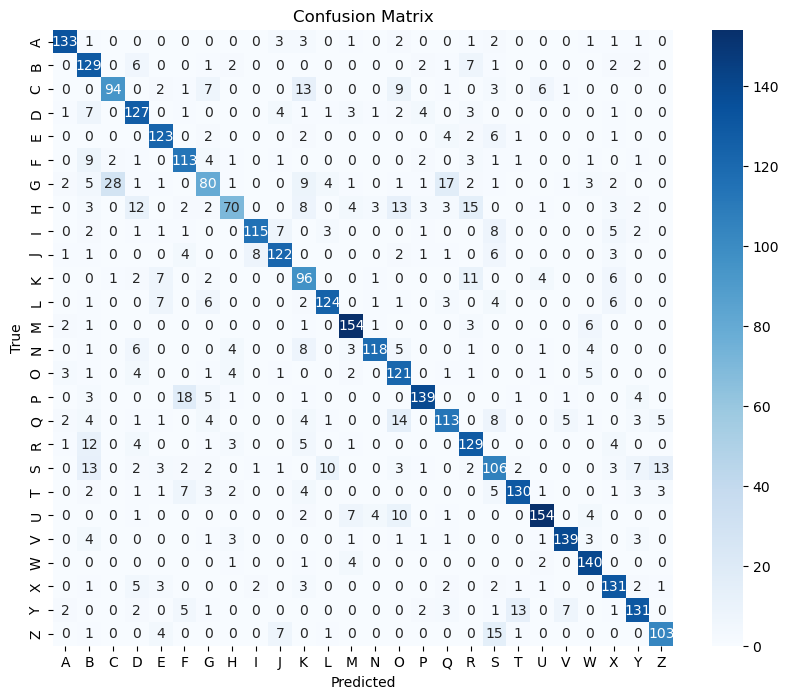

In [14]:
import numpy as np  # Import numpy
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the class labels on the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Use np.argmax to get the class labels

# Print the classification report
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


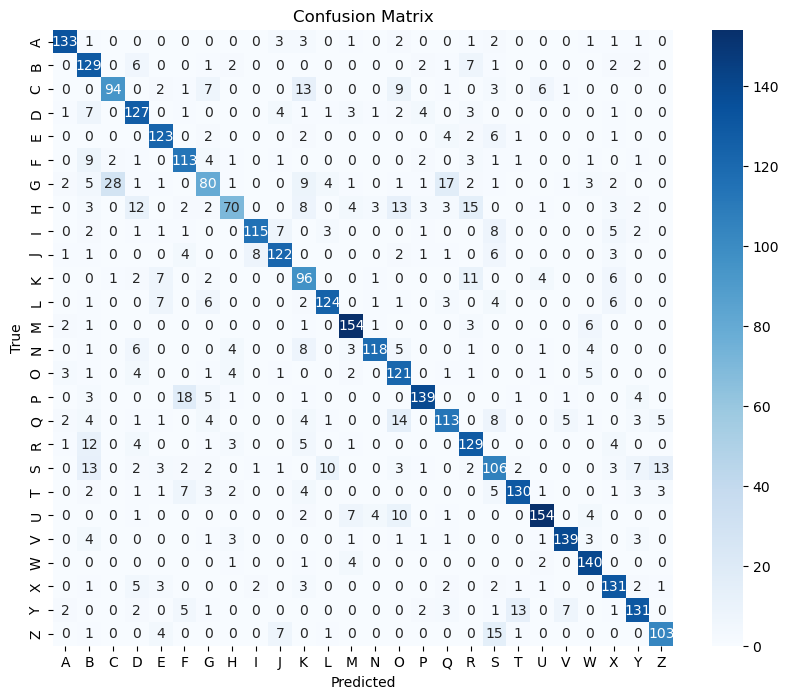

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights for imbalanced classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Fit the model with class weights
model.fit(X_train, y_train, class_weight=class_weight_dict, epochs=20, batch_size=32)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7721 - loss: 0.8783
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7754 - loss: 0.8739
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7696 - loss: 0.8568
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7802 - loss: 0.8365
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7849 - loss: 0.8287
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7794 - loss: 0.8218
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7810 - loss: 0.8177
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7853 - loss: 0.7955
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.7990
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7870 - loss: 0.7889
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7955 - loss: 0.7735
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.6909
Test Accuracy: 0.8117
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       149
           1       0.72      0.86      0.78       153
           2       0.84      0.69      0.76       137
           3       0.83      0.79      0.81       156
           4       0.80      0.84      0.82       141
           5       0.76      0.84      0.80       140
           6       0.68      0.59      0.63       160
           7       0.82      0.60      0.70       144
           8       0.94      0.80      0.86       146
           9       0.73      0.90      0.81       149
          10       0.73      0.72      0.72       130
          11       0.82      0.86      0.84       155
          12       0.91      0.91      0.91       168
          13       0.93      0.82      0.87       151
          14       0.76     

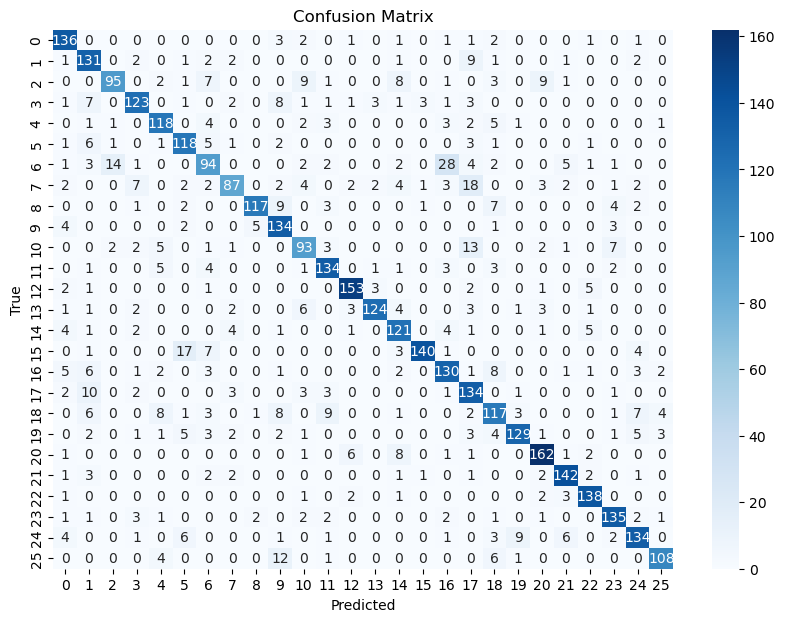

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#In this assignment, we utilized Artificial Neural Networks (ANNs) to classify data from the "Alphabets_data.csv" dataset.
#Through a structured approach, we explored, preprocessed, and normalized the data to ensure optimal input for the neural network model.
#After building a basic ANN with hidden layers, we proceeded to evaluate its performance using key metrics such as accuracy, precision, recall, and F1-score.